In [3]:
import pandas as pd
import os
import json
import shutil
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# Generating the Augmented Samples

In [3]:
num_examples = 5
diff_lb=0.2
diff_up=0.8
path = './augmented_data'

if os.path.exists(path):
    shutil.rmtree(path)

generate_dataset(path=path, n_examples=num_examples, diff_lb=diff_lb, diff_ub=diff_up)

task 400/400, example 5/5: 100%|██████████| 400/400 [00:31<00:00, 12.67it/s]


In [5]:
os.path.exists('/arc/data_augmentation')

False

In [5]:
#------------------Combining Augmented Dataset with Original Training Dataset-------------------#

# Paths
generated_dataset_path = '../augmented_data/tasks'
training_dataset_path = 'arc-prize-2024/arc-agi_training_challenges.json'
training_dataset_copy_path = 'arc-prize-2024/arc-agi_training_challenges_augmented.json'

if os.path.exists(training_dataset_copy_path):
    shutil.rmtree(training_dataset_copy_path)

# Step 1: Copy the original training dataset
shutil.copy(training_dataset_path, training_dataset_copy_path)
print(f"Copied {training_dataset_path} to {training_dataset_copy_path}")

# Step 2: Load the copied training dataset
with open(training_dataset_copy_path, "r") as training_dataset_file:
    training_dataset = json.load(training_dataset_file)

# Step 3: Iterate over the tasks and append augmented data
for task in training_dataset.keys():
    generated_task_path = os.path.join(generated_dataset_path, f"{task}.json")

    if os.path.exists(generated_task_path):
        with open(generated_task_path, "r") as augmented_task_file:
            # Load the augmented task JSON
            augmented_task_json_content = json.load(augmented_task_file)

            # Check if 'train' exists in the current task
            if "train" in training_dataset[task]:
                # Append augmented data
                training_dataset[task]["train"].extend(augmented_task_json_content)
            else:
                # If 'train' doesn't exist, initialize it
                training_dataset[task]["train"] = augmented_task_json_content

            print(f"Appended augmented data into task {task}")
    else:
        print(f"JSON file for the task {task} was not found")

# Step 4: Save the updated training dataset
with open(training_dataset_copy_path, "w") as updated_training_dataset_file:
    json.dump(training_dataset, updated_training_dataset_file)

print(f"Updated training dataset saved to {training_dataset_copy_path}")

Copied arc-prize-2024/arc-agi_training_challenges.json to arc-prize-2024/arc-agi_training_challenges_augmented.json
Appended augmented data into task 007bbfb7
Appended augmented data into task 00d62c1b
Appended augmented data into task 017c7c7b
Appended augmented data into task 025d127b
Appended augmented data into task 045e512c
Appended augmented data into task 0520fde7
Appended augmented data into task 05269061
Appended augmented data into task 05f2a901
Appended augmented data into task 06df4c85
Appended augmented data into task 08ed6ac7
Appended augmented data into task 09629e4f
Appended augmented data into task 0962bcdd
Appended augmented data into task 0a938d79
Appended augmented data into task 0b148d64
Appended augmented data into task 0ca9ddb6
Appended augmented data into task 0d3d703e
Appended augmented data into task 0dfd9992
Appended augmented data into task 0e206a2e
Appended augmented data into task 10fcaaa3
Appended augmented data into task 11852cab
Appended augmented data 

# Visualizing

In [6]:
train_challenges_directory = "arc-prize-2024/arc-agi_training_challenges_augmented.json"
train_solutions_directory = "arc-prize-2024/arc-agi_training_solutions.json"
evaluation_challenges_directory = "arc-prize-2024/arc-agi_evaluation_challenges.json"
evaluation_solutions_directory = "arc-prize-2024/arc-agi_evaluation_solutions.json"

In [7]:
with open(train_challenges_directory, 'r') as f:
    train_challenges = json.load(f)
with open(train_solutions_directory, 'r') as f:
    train_solutions = json.load(f)
with open(evaluation_challenges_directory, 'r') as f:
    evaluation_challenges = json.load(f)
with open(evaluation_solutions_directory, 'r') as f:
    evaluation_solutions = json.load(f)

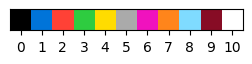

In [8]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25', "#FFFFFF"])
norm = colors.Normalize(vmin=0, vmax=10)

def plot_img(input_matrix, ax, title=""):
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True, which = 'both',color = 'lightgrey', linewidth = 0.5)
    ax.set_yticks([x-0.5 for x in range(1 + len(input_matrix))])
    ax.set_xticks([x-0.5 for x in range(1 + len(input_matrix[0]))]) 
    if len(title) > 0: ax.set_title(title)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
plt.figure(figsize=(3, 1), dpi=100)
plt.imshow([list(range(10+1))], cmap=cmap, norm=norm)
plt.xticks(list(range(10+1)))
plt.yticks([])
plt.show()

In [11]:
def plot_one(ax, i, train_or_test, input_or_output):
    input_matrix = task[train_or_test][i][input_or_output]
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True, which = 'both',color = 'lightgrey', linewidth = 0.5)
    
    plt.setp(plt.gcf().get_axes(), xticklabels=[], yticklabels=[])
    ax.set_xticks([x-0.5 for x in range(1 + len(input_matrix[0]))])     
    ax.set_yticks([x-0.5 for x in range(1 + len(input_matrix))])
    
    ax.set_title(train_or_test + ' ' + input_or_output)

def plot_task(task, task_solutions, i, t):
    """    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app    """    
    
    num_train = len(task['train'])
    num_test  = len(task['test'])
    
    w=num_train+num_test
    fig, axs  = plt.subplots(2, w, figsize=(3*w ,30))
    plt.suptitle(f'Set #{i}, {t}:', fontsize=20, fontweight='bold', y=1)
    #plt.subplots_adjust(hspace = 0.15)
    #plt.subplots_adjust(wspace=20, hspace=20)
    
    for j in range(num_train):     
        plot_one(axs[0, j], j,'train', 'input')
        plot_one(axs[1, j], j,'train', 'output')        
    
    
    plot_one(axs[0, j+1], 0, 'test', 'input')


    answer = task_solutions
    input_matrix = answer
    
    axs[1, j+1].imshow(input_matrix, cmap=cmap, norm=norm)
    axs[1, j+1].grid(True, which = 'both',color = 'lightgrey', linewidth = 0.5)
    axs[1, j+1].set_yticks([x-0.5 for x in range(1 + len(input_matrix))])
    axs[1, j+1].set_xticks([x-0.5 for x in range(1 + len(input_matrix[0]))])     
    axs[1, j+1].set_xticklabels([])
    axs[1, j+1].set_yticklabels([])
    axs[1, j+1].set_title('Test output')

    axs[1, j+1] = plt.figure(1).add_subplot(111)
    axs[1, j+1].set_xlim([0, num_train+1])
    
    for m in range(1, num_train):
        axs[1, j+1].plot([m,m],[0,1],'--', linewidth=1, color = 'black')
    
    axs[1, j+1].plot([num_train,num_train],[0,1],'-', linewidth=3, color = 'black')

    axs[1, j+1].axis("off")

    fig.patch.set_linewidth(5)
    fig.patch.set_edgecolor('black') 
    fig.patch.set_facecolor('#dddddd')
   
    plt.tight_layout()
    
    print(f'#{i}, {t}') # for fast and convinience search
    plt.show()  
    
    print()
    print()

#3, 025d127b


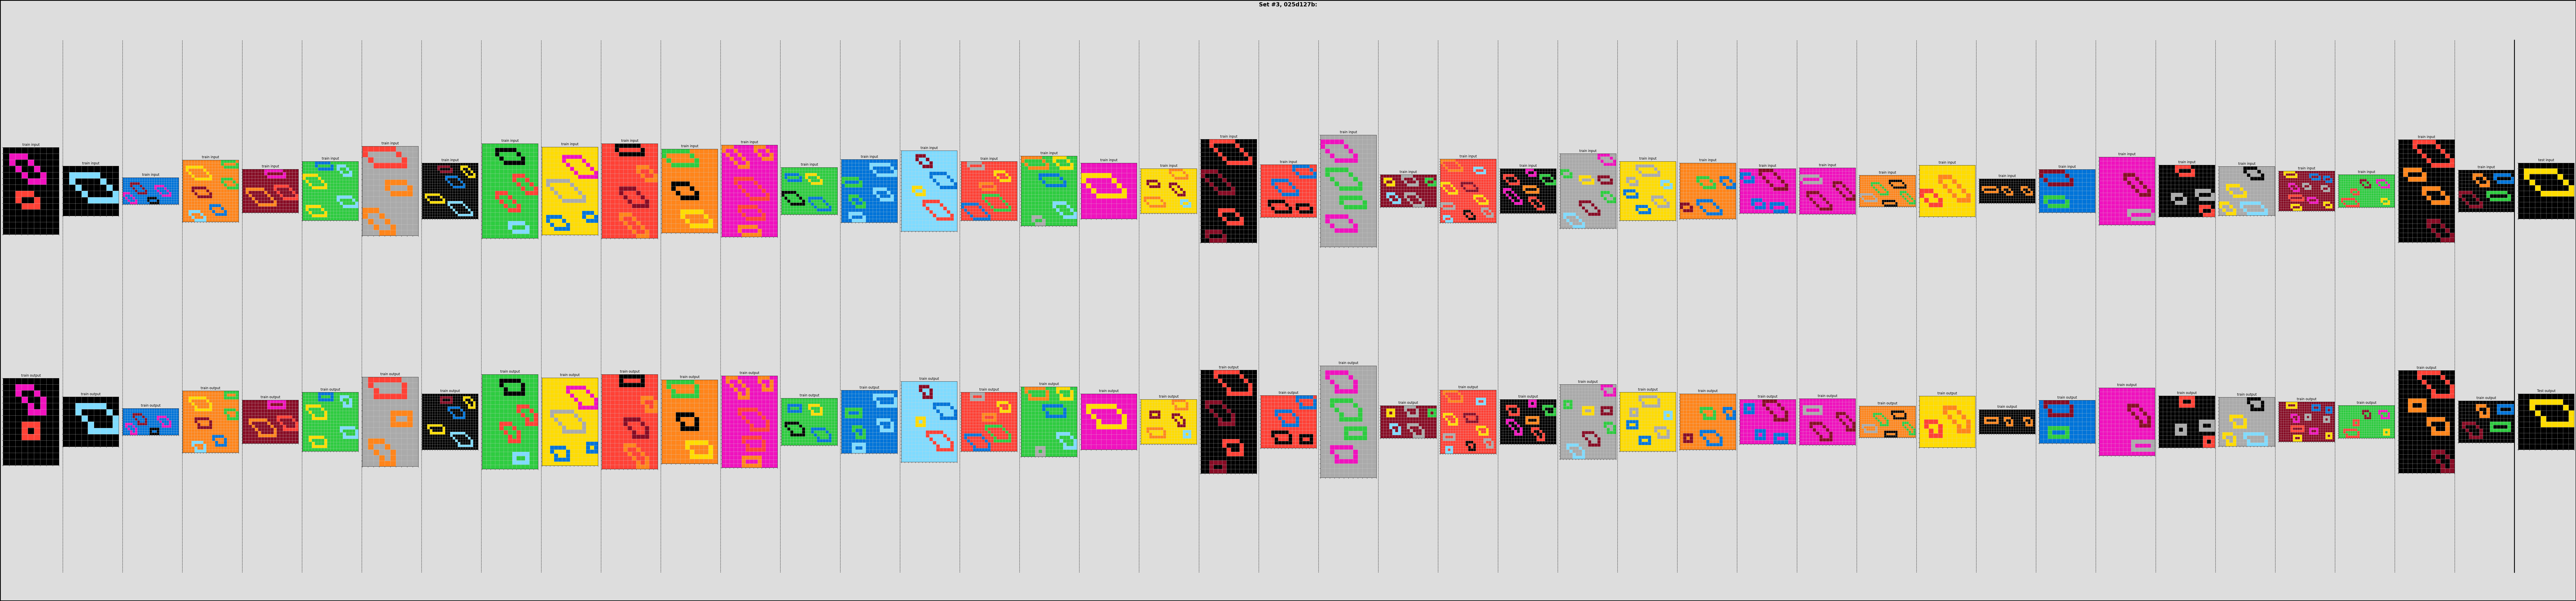

In [13]:
for i in range(3,4):
    t=list(train_challenges)[i]
    task=train_challenges[t]
    task_solution = train_solutions[t][0]
    plot_task(task,  task_solution, i, t)